In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 5)

In [3]:
df = pd.read_csv("titanic.csv")

In [4]:
df.get_dtype_counts()

float64    2
int64      5
object     5
dtype: int64

In [7]:
df = pd.read_csv("column_hell.csv")
df.head()
selected_columns = df.filter(like="-")


## DOTA Hero stats

In [112]:
df = pd.read_csv("dota_hero_stats.csv", index_col = 0)
df.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [109]:
df.filter(items=['attack_type','primary_attr']).mode()

,attack_type,primary_attr
0,Ranged,int


In [110]:
df.legs.value_counts()

2    95
0    11
4     7
6     3
8     1
Name: legs, dtype: int64

In [155]:
# Most popular number of roles
# Values of roles column content lists in string format, we need to separate them onto values
df.roles.str.split(',').apply(len).mode()

0    4
dtype: int64

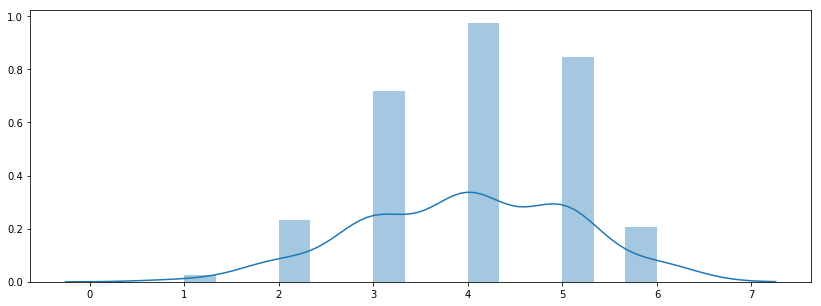

In [164]:
sns.distplot([x.count(',')+1 for x in df.roles], bins=15);

In [172]:
df['roles'].apply(lambda v: len(eval(v))).value_counts()

4    38
5    33
3    28
2     9
6     8
1     1
Name: roles, dtype: int64

## Pupa & Loopa

In [20]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/accountancy.csv")
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Executor,Type,Salary
0,Pupa,D,63
1,Pupa,A,158
2,Pupa,D,194
3,Pupa,E,109
4,Loopa,E,184


In [59]:
sub_df=df.groupby(['Type','Executor']).Salary.mean().unstack()
sub_df['Max'] = np.where(sub_df.Loopa > sub_df.Pupa, 'Loopa', 'Pupa')
sub_df

Executor,Loopa,Pupa,Max
Type,,,
A,58.000000,160.833333,Pupa
B,145.166667,77.000000,Loopa
C,154.333333,74.500000,Loopa
D,137.714286,146.500000,Pupa
E,164.000000,131.200000,Loopa
F,238.000000,136.250000,Loopa


## Seaweed

In [35]:
concentrations = pd.read_csv("http://stepik.org/media/attachments/course/4852/algae.csv")
concentrations.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [23]:
#mean_concentrations = \
concentrations.groupby('genus').mean()

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [33]:
concentrations[concentrations.genus=='Fucus'].alanin.describe().round(2)

count    3.00
mean     3.57
std      3.15
min      0.35
25%      2.03
50%      3.71
75%      5.18
max      6.64
Name: alanin, dtype: float64

In [34]:
# !!! KPACUBO
concentrations.query("genus == 'Fucus'").agg({'alanin': ['max','mean','min'] }).round(2)

,alanin
max,6.64
mean,3.57
min,0.35


In [53]:
# MULTI-INDEX!!!
a=concentrations.groupby('group').agg({'sucrose': ['max','mean','min'], 'citrate': 'var' }).round(2)
a['sucrose_range'] = a.loc[:,('sucrose', 'max')] - a.loc[:,('sucrose', 'min')]
a

sucrose             citrate sucrose_range
          max  mean   min     var              
group                                          
brown    6.83  4.71  1.64    5.47          5.19
green    5.71  4.01  2.45    3.95          3.26
red      0.70  0.70  0.70     NaN          0.00

## Tasks 1.6-1.7

In [60]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/income.csv")
df.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


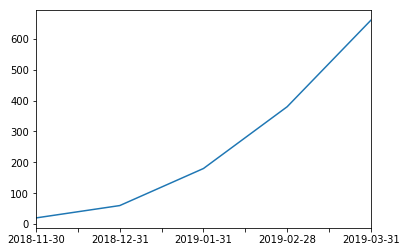

In [74]:
# sns.lineplot(x=df.index, y=df.income);
# df.plot(kind='line');
# df['income'].plot();
# df.income.plot();
# sns.lineplot(data=df);
# plt.plot(df.index, df.income);
# df.plot()

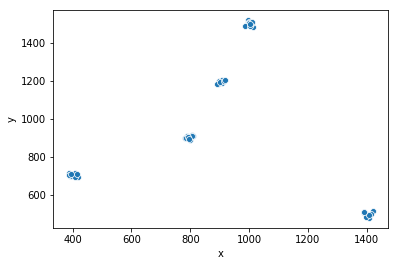

In [88]:
df = pd.read_csv("C:\\Users\Jack\Downloads\dataset_209770_6.txt", sep=" ")
df.head()
sns.scatterplot(df.x, df.y)

In [97]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/genome_matrix.csv", index_col = 0)
df.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


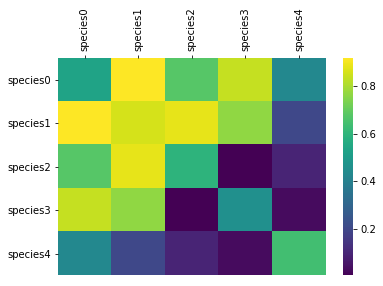

In [106]:
g = sns.heatmap(df, cmap='viridis')
# ваш код для создания теплокарты, укажите параметр cmap=viridis для той же цветовой схемы
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

## Iris

In [177]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/iris.csv", index_col = 0)
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


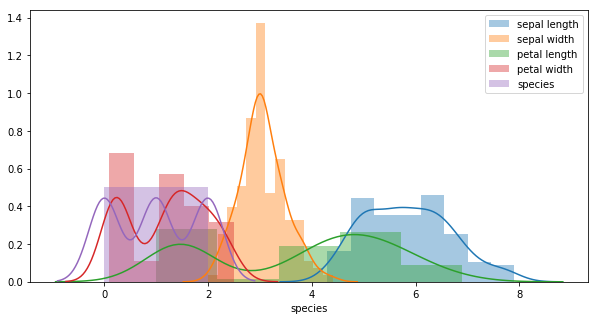

In [212]:
plt.rcParams['figure.figsize'] = (10, 5)
for column in df:
    sns.distplot(df[column],label=column);
plt.legend();

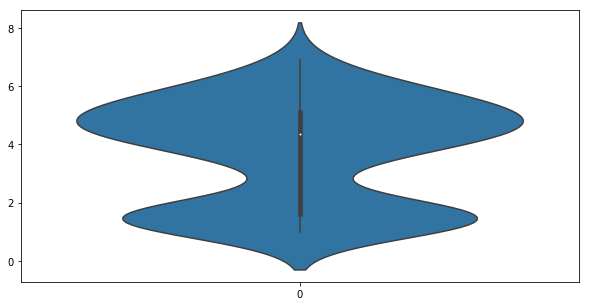

In [213]:
sns.violinplot(data=df['petal length']);

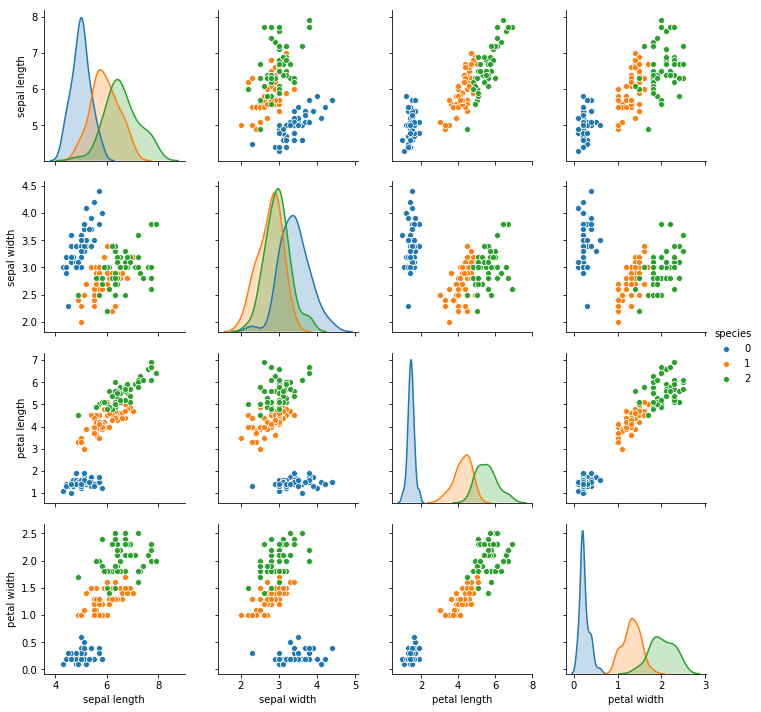

In [218]:
#sns.pairplot(df, hue='species', vars=['sepal length', 'sepal width', 'petal length', 'petal width']);
sns.pairplot(df, hue='species', vars=df.columns[:4]);

## Step 1.8 Practice

In [12]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [29]:
my_stat.dtypes
my_stat.shape

(500, 4)

In [27]:
# first 10 strings and 1st, 3rd columns
subset_1 = my_stat.iloc[:10,[0,2]]
subset_1
# all strings except 1st and 5th; only 2nd and 4th columns
subset_2 = my_stat.iloc[~my_stat.index.isin([0, 4]),[1,3]]
#subset_2 = my_stat[~my_stat.index.isin([0, 4])].iloc[:,[1,3]]
#subset_2 = my_stat.drop([0,4],axis=0).iloc[:,[1,3]] #these two also works
subset_2

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0
7,9.0,1.0
8,9.0,2.0
9,10.0,0.0
10,10.0,1.0
11,10.0,1.0


In [40]:
# V1>0 and V3 == 'A'
#subset_1 = my_stat[(my_stat.V1 > 0) & (my_stat.V3 == 'A')]  #faster
subset_1 = my_stat.query("V1 > 0 & V3 == 'A'")  # more convenient
subset_1
# V2 !=10 or V4 >= 1
# subset_2 = my_stat[(my_stat.V2 != 10) | (my_stat.V4 >= 1)]
subset_2 = my_stat.query("V2!=10 | V4>=1")
subset_2

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
6,0,9.0,A,2.0
7,1,9.0,A,1.0
8,0,9.0,B,2.0
10,1,10.0,A,1.0
11,-2,10.0,A,1.0


In [45]:
#my_stat['V5'] = my_stat.V1 + my_stat.V4  # faster
my_stat.eval("V5 = V1 + V4", inplace=True)  # more convenient
my_stat['V6'] = np.log(my_stat.V2)
my_stat.head()

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [47]:
my_stat.rename(columns={'V1':'session_value','V2':'group','V3':'time','V4':'n_users'}, inplace=True)
my_stat.head()

,session_value,group,time,n_users,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [60]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
my_stat.query('session_value != session_value')


(10, 4)

In [78]:
# fill NaN in one column with zeros
my_stat.session_value.fillna(0, inplace=True)
# change all negative values of n_users to mean of non-negative n_users
#my_stat.n_users = np.where(my_stat.n_users < 0, my_stat.query('n_users >= 0').n_users.median(), my_stat.n_users)
#my_stat.loc[my_stat.n_users<0, 'n_users']=my_stat.query("n_users>=0").n_users.median()
my_stat.n_users = my_stat.n_users.where(my_stat.n_users >= 0, my_stat.n_users[my_stat.n_users >= 0].median())
my_stat

,session_value,time,group,n_users
0,0.0,12.0,B,9.0
1,0.0,11.0,A,0.7
2,1.0,8.0,A,1.0
3,2.0,9.0,B,3.0
4,2.0,10.0,B,9.0
5,3.0,8.0,A,8.0
6,0.0,11.0,B,5.0
7,0.0,9.0,A,4.0
8,0.0,8.0,B,0.7
9,0.0,9.0,A,0.7


In [83]:
# mean session_value for each group. Insert in to mean_session_value in df mean_session_value_data
mean_session_value_data = my_stat.groupby('group', as_index=False).agg({'session_value':'mean'})
mean_session_value_data.rename(columns={'session_value':'mean_session_value'}, inplace=True)
mean_session_value_data

,group,mean_session_value
0,A,0.8
1,B,0.8
